## **データ前処理入門**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Academy Bootcamp/Titanic_kaggle/train.csv")

# dfを成型。train_yをtrain_xを作成
train_y = df["Survived"]
train_x = df.drop(["Survived"], axis=1)

In [ ]:
train_x = train_x[["Pclass", "Age", "Sex"]]
train_x.head()

,Pclass,Age,Sex
0,3,22.0,male
1,1,38.0,female
2,3,26.0,female
3,1,35.0,female
4,3,35.0,male


●前処理

In [ ]:
import pandas as pd
from io import StringIO

# サンプルデータの作成
# """XXX"""：ダブルコーテーション（or シングルコーテーション）3つで囲むことで、複数行にわたる文字列を定義できる
# 今回の場合はカンマで区切られているのでCSVフォーマットになってる
data = """A,B,C,D
1.0, 2.0, 3.0,
10.0, 20.0,, 30.0"""

# CSVフォーマットデータ（data）をpandasのDataFrameに変換
# StringIO()：文字列をファイルオブジェクトのように扱うことができる
df = pd.read_csv(StringIO(data))
print(df)

      A     B    C     D
0   1.0   2.0  3.0   NaN
1  10.0  20.0  NaN  30.0


In [ ]:
# 各特徴量の欠損値をカウント
print(df.isnull().sum())

A    0
B    0
C    1
D    1
dtype: int64


●特徴量を取り除く

In [ ]:
# 欠損値を1つでも含む行を削除
df.dropna()

# 欠損値を1つでも含む列を削除
df.dropna(axis=1)

# すべての列がNaNの行のみを削除
df.dropna(how="all")

# 非NaN値が5つの未満の行のみを削除
df.dropna(thresh=5)

# 特定の列（ここでは"C"）にNaNが含まれてる行のみを削除
df.dropna(subset=["C"])

,A,B,C,D
0,1.0,2.0,3.0,NaN


●補間法

In [ ]:
# 平均補間法
from sklearn.impute import SimpleImputer

# 平均値で欠損値を補間するためのインスタンスを作成
# 引数 strategy：補間の方法を指定する（他には中央値とか最頻値とか固定値とか）
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imp = SimpleImputer(strategy = "mean")

# 欠損値を補間
imp.fit(df)
df = imp.transform(df)
print(df)

[[ 1.  2.  3. 30.]
 [10. 20.  3. 30.]]


●エンコーディング


> Labelエンコーディング

> ⇨カテゴリ変数を数値データに直す









In [ ]:
# 警告文を非表示
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import LabelEncoder

# LabelEncoderクラスをインスタンス化
enc = LabelEncoder()
# Sexカラムに対してラベルエンコーディングを行う
# abel_encoder = enc.fit(train_x["Sex"]) でもOK
label_encoder = enc.fit(train_x[["Sex"]])

# カラムの要素を取得
# classes_：クラスのラベルを返す属性
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
print("Categorical classes:", label_encoder.classes_)

# transform()で数値へ変換
# クラスラベルそのものの変換（多分実際は使わない）
integer_classes = label_encoder.transform(label_encoder.classes_)
print("Integer classes:", integer_classes)

# Sexカラムすべてをラベルエンコーディング
t = label_encoder.transform(train_x[["Sex"]])
train_x["Sex"] = t

# 上記のコードは以下のように１行にすることも可能（こっちが普通）
# train_x["Sex"] = label_encoder.transform(train_x[["Sex"]])

# ラベルエンコーディングされたことを確認
print(train_x[["Sex"]])

Categorical classes: ['female' 'male']
Integer classes: [0 1]
     Sex
0      1
1      0
2      0
3      0
4      1
..   ...
886    1
887    0
888    0
889    1
890    1

[891 rows x 1 columns]


> One-hotエンコーディング

> ⇨カテゴリ変数を符号化する（ダミー変数）

> ⇨ラベルが2種（男女とか）の場合は不要な列を増やさないためにLabelエンコーディングが適当









In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Academy Bootcamp/Titanic_kaggle/train.csv")
# Pclassカラムのみ抽出
titanic = df2[["Pclass"]]

# OneHotEncoderのインスタンス化
# コンストラクタ引数 sparse：
# True・・・scipy.sparse.csr.csr_matrix
# False・・・numpy.ndarray
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# https://qiita.com/k-y-river/items/23f7a125e12e8f679ff9

# csr.matrixにすると後々扱いが厄介なのでnp.ndarrayにする
enc = OneHotEncoder(sparse=False)

# One-Hotエンコーディングを実施
# transform()で返ってくるデータ型はnp.ndarray
# Pclassのラベルは3種なのでnew_featuresは3次元ベクトル
one_hot_encoder = enc.fit(titanic)
new_features = one_hot_encoder.transform(titanic)

# カラムの作成
columns = []
cols = ["Pclass"]

# enumerate()：インデックス番号、要素の順に取得
### 下のループは1周しかしてない。891周しない？　###
### それで何でone_hot_encoder.categories_[i] = [1 2 3]になる？ ###
for i, c in enumerate(titanic[cols]):
  columns += [f"{v}" for v in one_hot_encoder.categories_[i]]
  print(i)
  print(one_hot_encoder.categories_[i])

# pandasのDataFrame型に変換
one_hot_df = pd.DataFrame(new_features, columns=columns)
# 内容の確認
one_hot_df.head()

0
[1 2 3]


,1,2,3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


## **CRISP-DM入門**

●データの理解

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Academy Bootcamp/5週目/tidy-data/data/train.csv") 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


●info()の解釈


*   missing data（欠損値）の有無
*   データ型の確認（文字列はobjectとして格納）
> ⇨機械学習にかけるときはすべて数値データである必要





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


●describe()の解釈


*   数値データのみ統計量として表示される(文字列データは存在しない。IDのようなものも表示されてしまう)
*   mean,std,min,maxでデータが取りうる範囲を確認
*   mix,maxによる外れ値の確認(例えばAgeに120という表示が入っていたらどうするか)





In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


●概要確認のためのメソッド集（Pandas）

In [ ]:
df.head() # DataFrameの最初5行を表示
df.tail() # DataFrameの末尾5行を表示
df.info() # カラム名とその型の一覧を表示
df.columns # DataFrameのカラム名を表示
df.shape # DataFrameの次元数を表示
df.describe() # 基本統計量を表示（数値データのみ）
df.sample() # ランダムサンプリング

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C


●データの可視化

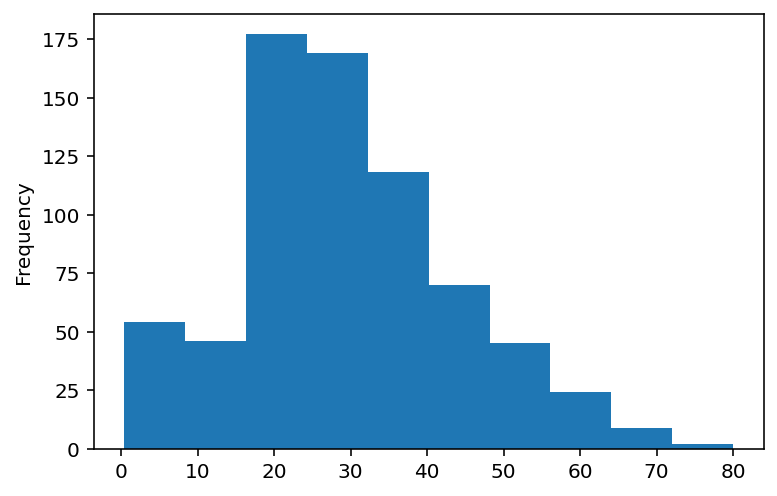

In [ ]:
import seaborn as sns
%matplotlib inline
# 解像度を上げるためのコマンド
%config InlineBackend.figure_formats = {"png", "retina"}
# Ageごとのヒストグラムを作成する
# df["Age"].plot(kind="hist") でも同じ
df.Age.plot(kind="hist")

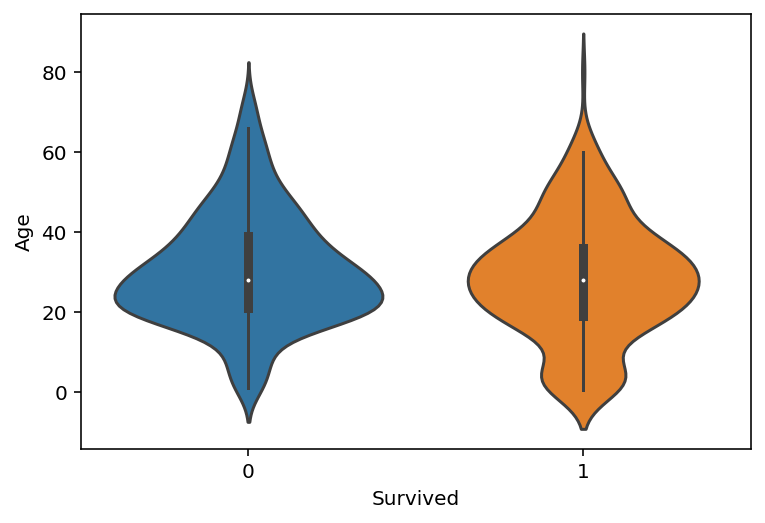

In [ ]:
# 生存者と死亡者を分けて年齢の分布を作成する
# Survivedカラムに対して集計
df.Survived.value_counts()
# 生存有無で年齢分布を確認
sns.violinplot(x="Survived", y="Age", data=df)

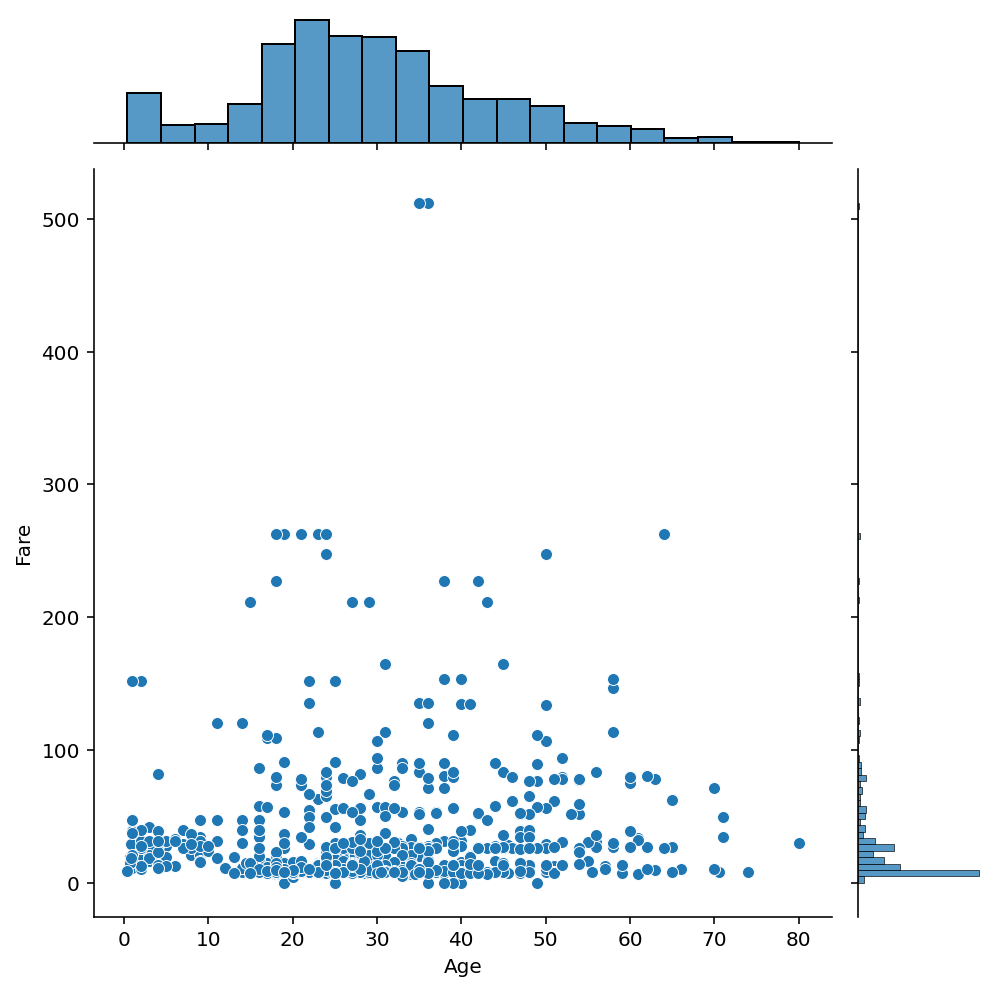

In [ ]:
# 年齢（Age）とチケット料金（Fare）の関係
# jointplot()：ヒストグラム付きの散布図を作成する
sns.jointplot(x="Age", y="Fare", data=df, size=7)

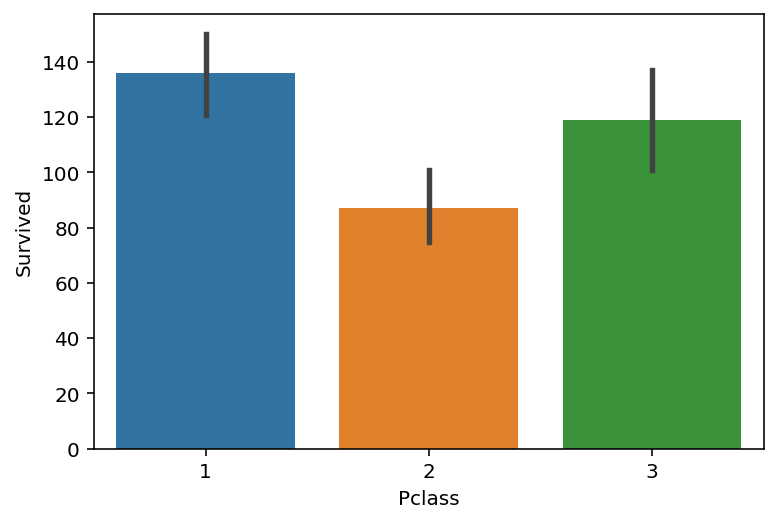

In [ ]:
# 乗客の階級（Pclass）と生存者の関係を確認する
# Pclassは1が1番高い階層、3が1番低い階層
# 引数 estimator：yの出力を何にするか。Defaultは”mean”
sns.barplot(x="Pclass", y="Survived", data=df, estimator=sum)

●Preparation for machine learning

In [ ]:
# Sexカラムをカテゴリデータ⇨数値データに変換する
# 初期のtitanicデータを確認。Sexカラムはobject型=数値データではない
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# unique()：指定したカラム内の要素を重複なしで抽出
print(df.Sex.unique())

['male' 'female']


In [ ]:
# male, femaleを数値データに変換するためのDictionaryを作成
change_sex_to_numerical = {"male":0, "female":1}
# map()：pd.Seriesに対して一括処理を実施する
# https://punhundon-lifeshift.com/pandas_map_apply
df["Sex"] = df.Sex.map(change_sex_to_numerical)
# Sexカラムがint型=数値データになってる
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
None


●欠損値を持つデータセットの対処法

In [ ]:
# 欠損値が多いカラム（Name, Cabin, Ticket）を削除する
# axis=0：行を削除、axis=!：列を削除
df.drop(["Name"], axis=1)
# リストで渡すことも可能
df.drop(["Name", "Cabin", "Ticket"], axis=1)

# 目的変数であるEmbarkedも併せて削除する
df2 = df.drop(["Name", "Cabin", "Ticket", "Embarked"], axis=1)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None


In [ ]:
# Ageカラムに対する欠損値の処理
# 欠損値すべてに0を代入
df2 = df2.fillna(0)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None


## **不均衡データの処理**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Academy Bootcamp/5週目/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# value_counts()：列内のユニークな要素名と出現回数を返す
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# アンダーサンプリングを実施
from imblearn.under_sampling import RandomUnderSampler

# RandomUnderSamplerをインスタンス化
under_sampler = RandomUnderSampler(random_state=123)

X = df[["V1", "V2", "Amount"]]
y = df["Class"]

# アンダーサンプリング
X, y = under_sampler.fit_resample(X, y)

# 結果の表示
# Class = 0 の件数が492となっていて正しく変換されている
import numpy as np
print(np.sum(y == 1), np.sum(y == 0))

492 492


In [ ]:
# オーバーサンプリングを実施
from imblearn.over_sampling import RandomOverSampler

# RandomOverSamplerをインスタンス化
over_sampler = RandomOverSampler(random_state=123)

X = df[["V1", "V2", "Amount"]]
y = df["Class"]

X, y = over_sampler.fit_resample(X, y)

# 結果の表示
# Class = 1 の件数が284315となっていて正しく変換されている
import numpy as np
print(np.sum(y))

284315 284315
